An airline is a company that provides air transport services for traveling passengers and freight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight. Generally, airline companies are recognized with an air operating certificate or license issued by a governmental aviation body. Airlines may be scheduled or charter operators.


Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years and is now largely determined by computerized yield management systems.


The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. The price may rely upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.







In [80]:
import numpy as np

In [81]:
import pandas as pd


In [82]:
import matplotlib.pyplot as plt 


In [83]:
import seaborn as sns


In [84]:
from sklearn.model_selection import train_test_split


In [85]:
from sklearn.preprocessing import LabelEncoder


In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [87]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [88]:
from sklearn.svm import SVR


In [89]:
from sklearn.neighbors import KNeighborsRegressor


In [90]:
import xgboost as xgb
import catboost
import lightgbm as lgb


from sklearn.metrics import mean_squared_error


In [91]:
df = pd.read_csv('Clean_Dataset.csv')

df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [93]:
df.isnull().sum()


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [94]:
df.duplicated().sum()

0

# Data Cleaning


In [95]:
df = df.drop(columns='Unnamed: 0')

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [96]:
count = df.airline.value_counts()

percentage = df.airline.value_counts(normalize=True)*100

freq_table = pd.DataFrame({'Frequency':count,'Percent':percentage})

freq_table

,Frequency,Percent
airline,,
Vistara,127859,42.597942
Air_India,80892,26.950255
Indigo,43120,14.366007
GO_FIRST,23173,7.720396
AirAsia,16098,5.363265
SpiceJet,9011,3.002136


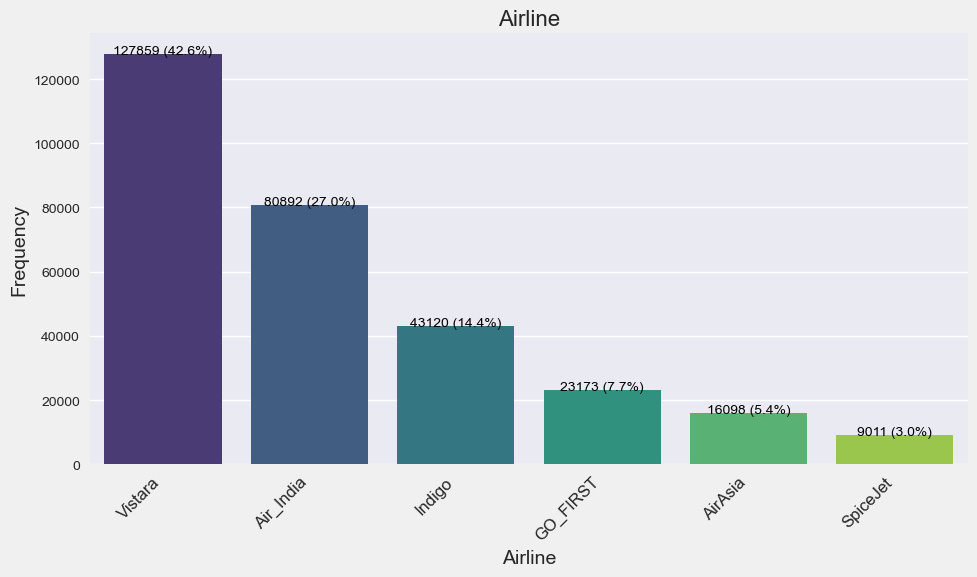

In [97]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')

# Assign `x` to `hue` and set `legend=False`
ax = sns.barplot(x=freq_table.index, y="Frequency", hue=freq_table.index, data=freq_table, palette="viridis", legend=False)

for i, (freq, perc) in enumerate(zip(freq_table['Frequency'], freq_table['Percent'])):
    ax.text(i, freq + 0.5, f'{freq} ({perc:.1f}%)', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Airline", fontsize=16)
plt.tight_layout()

plt.show()


In [98]:
counts = df['source_city'].value_counts()


C:\Users\sasi virat\AppData\Local\Temp\ipykernel_19768\603772504.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=counts.index,x=counts,palette='viridis')


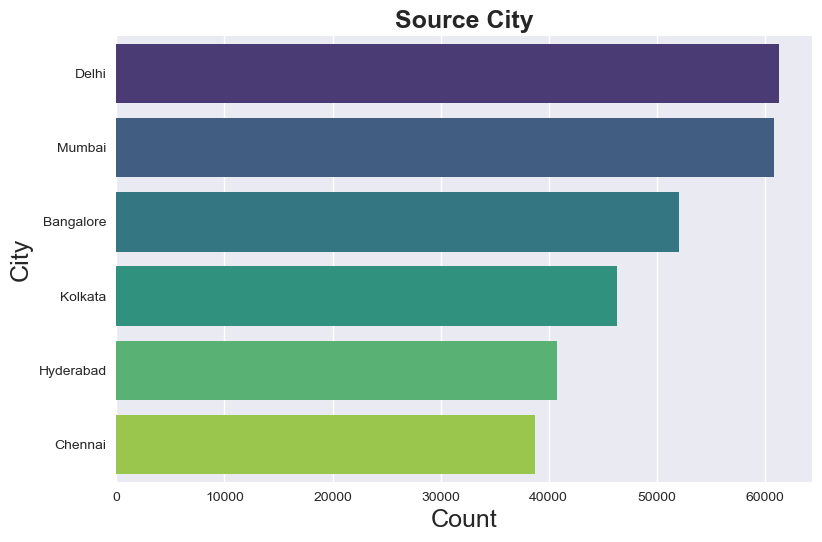

In [99]:
sns.barplot(y=counts.index,x=counts,palette='viridis')

plt.title('Source City',fontsize=18,fontweight='600')

plt.xlabel('Count',fontsize=18)

plt.ylabel('City',fontsize=18)

plt.show()

In [100]:
counts = df['departure_time'].value_counts()


C:\Users\sasi virat\AppData\Local\Temp\ipykernel_19768\2059511387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=counts.index,x=counts,palette='viridis')


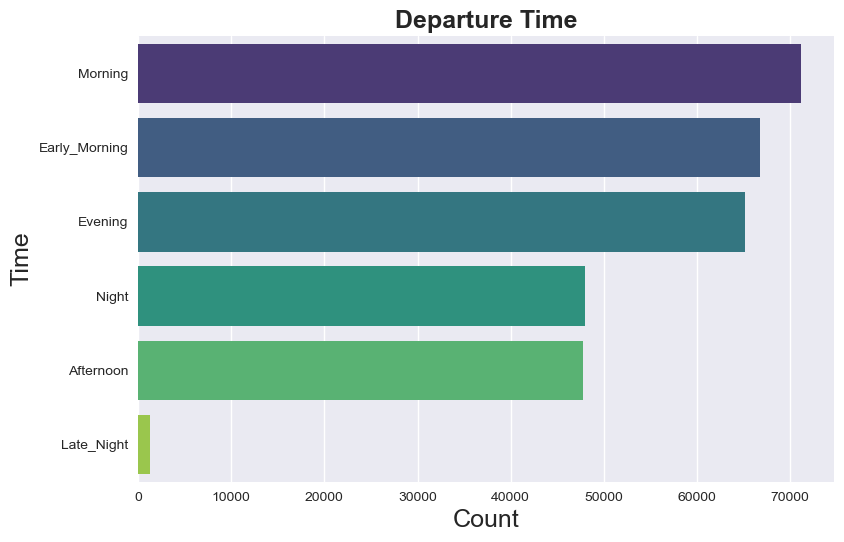

In [101]:
sns.barplot(y=counts.index,x=counts,palette='viridis')

plt.title('Departure Time',fontsize=18,fontweight='600')

plt.xlabel('Count',fontsize=18)

plt.ylabel('Time',fontsize=18)

plt.show()

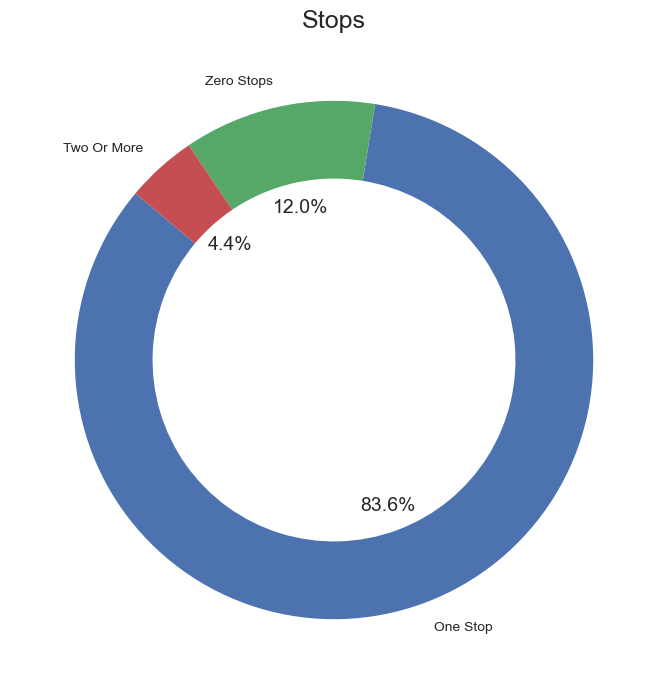

In [102]:
counts = df['stops'].value_counts()



plt.figure(figsize=(8, 8))

plt.pie(counts, labels=['One Stop','Zero Stops','Two Or More'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))  

plt.title("Stops", fontsize=18)



plt.show()

C:\Users\sasi virat\AppData\Local\Temp\ipykernel_19768\3667428239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=counts.index,x=counts,palette='viridis')


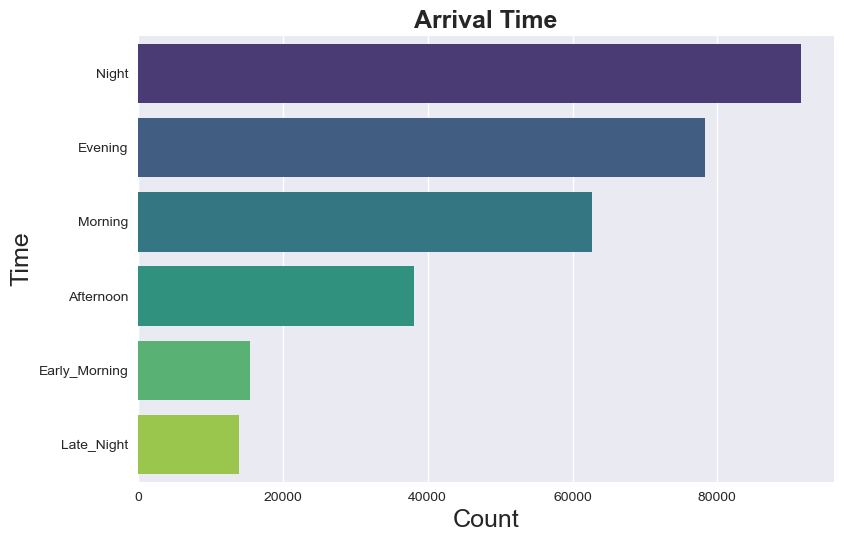

In [103]:
counts = df['arrival_time'].value_counts()

sns.barplot(y=counts.index,x=counts,palette='viridis')

plt.title('Arrival Time',fontsize=18,fontweight='600')

plt.xlabel('Count',fontsize=18)

plt.ylabel('Time',fontsize=18)

plt.show()

C:\Users\sasi virat\AppData\Local\Temp\ipykernel_19768\997810161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=counts.index,x=counts,palette='viridis')


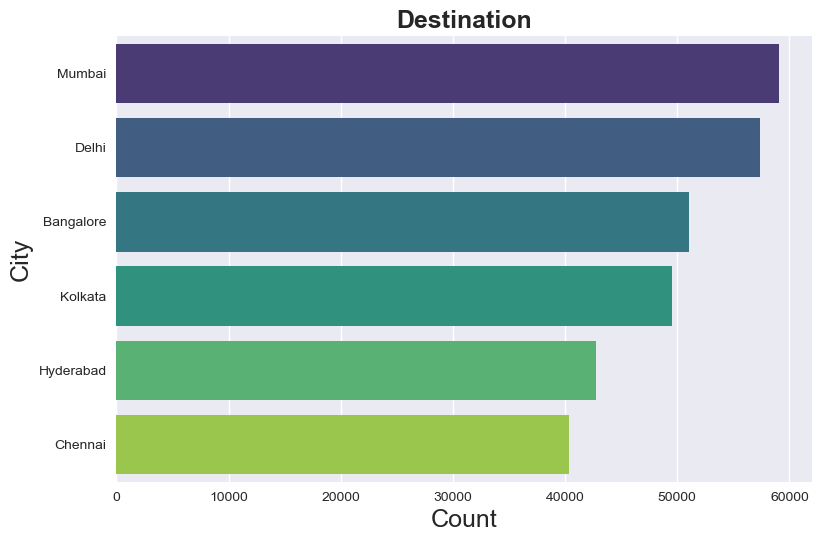

In [104]:
counts = df['destination_city'].value_counts()

sns.barplot(y=counts.index,x=counts,palette='viridis')

plt.title('Destination',fontsize=18,fontweight='600')

plt.xlabel('Count',fontsize=18)

plt.ylabel('City',fontsize=18)

plt.show()

C:\Users\sasi virat\AppData\Local\Temp\ipykernel_19768\4259194510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index,y=counts,palette='viridis')


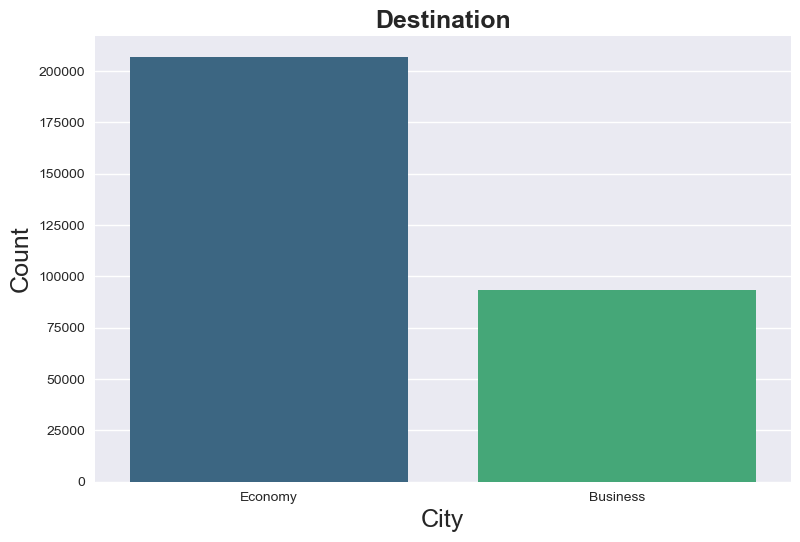

In [105]:
counts = df['class'].value_counts()

sns.barplot(x=counts.index,y=counts,palette='viridis')

plt.title('Destination',fontsize=18,fontweight='600')

plt.ylabel('Count',fontsize=18)

plt.xlabel('City',fontsize=18)

plt.show()

In [106]:
df.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

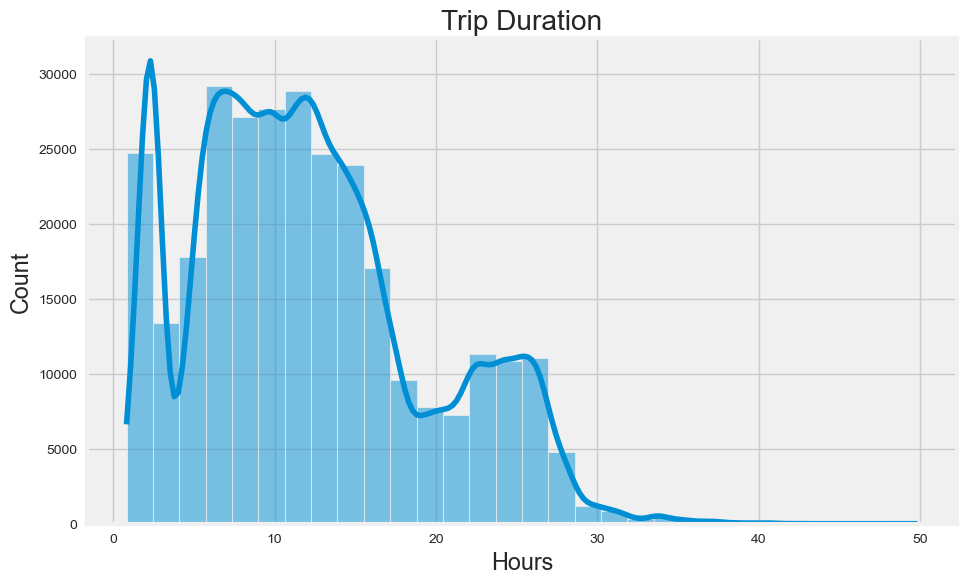

In [107]:
plt.figure(figsize=(10, 6))

plt.style.use('fivethirtyeight')

sns.histplot(df['duration'], bins=30, kde=True)

plt.title('Trip Duration')

plt.xlabel('Hours')

plt.ylabel('Count')

plt.show()

In [108]:
df['days_left'].describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

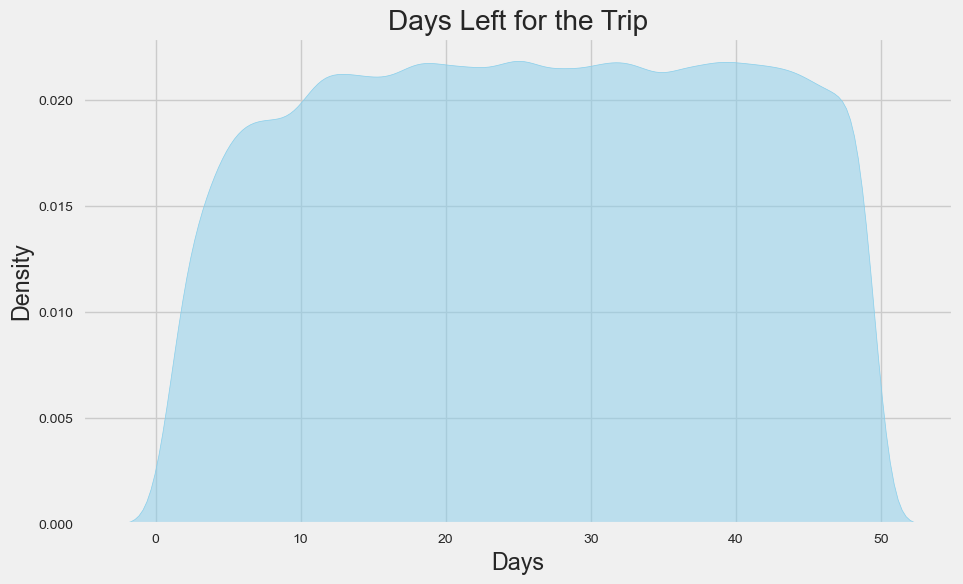

In [109]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['days_left'], fill=True, color="skyblue", alpha=0.5)

plt.title("Days Left for the Trip")

plt.xlabel("Days")

plt.ylabel("Density")

plt.show()

In [110]:
df.price.describe()


count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

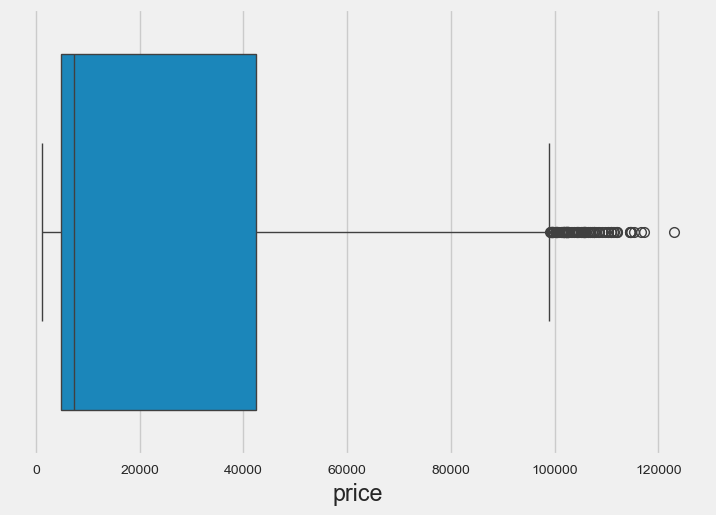

In [111]:
sns.boxplot(x=df['price'])

plt.show()

# Detecting Outliers¶


In [112]:
Q1 = df['price'].quantile(0.25)

Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

outliers

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216094,Vistara,UK-995,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,UK-836,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597
296001,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832
296081,Vistara,UK-832,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384
296170,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624


In [113]:
outliers.duration.describe()


count    123.000000
mean      14.403171
std        5.388195
min        5.920000
25%       10.710000
50%       13.330000
75%       17.125000
max       28.170000
Name: duration, dtype: float64

In [114]:
outliers['class'].value_counts()


class
Business    123
Name: count, dtype: int64

In [115]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [116]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300030 non-null  object 
 1   flight            300030 non-null  object 
 2   source_city       300030 non-null  object 
 3   departure_time    300030 non-null  object 
 4   stops             300030 non-null  object 
 5   arrival_time      300030 non-null  object 
 6   destination_city  300030 non-null  object 
 7   class             300030 non-null  object 
 8   duration          300030 non-null  float64
 9   days_left         300030 non-null  int64  
 10  price             300030 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [117]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Data Preprocessing¶


In [118]:
df = df.drop(columns='flight')


# Enocoding

In [119]:
categorical_cols = df.iloc[:,:7]

categorical_cols.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy


In [120]:
label_encoder = LabelEncoder()

for col in categorical_cols:

    df[col] = label_encoder.fit_transform(df[col])

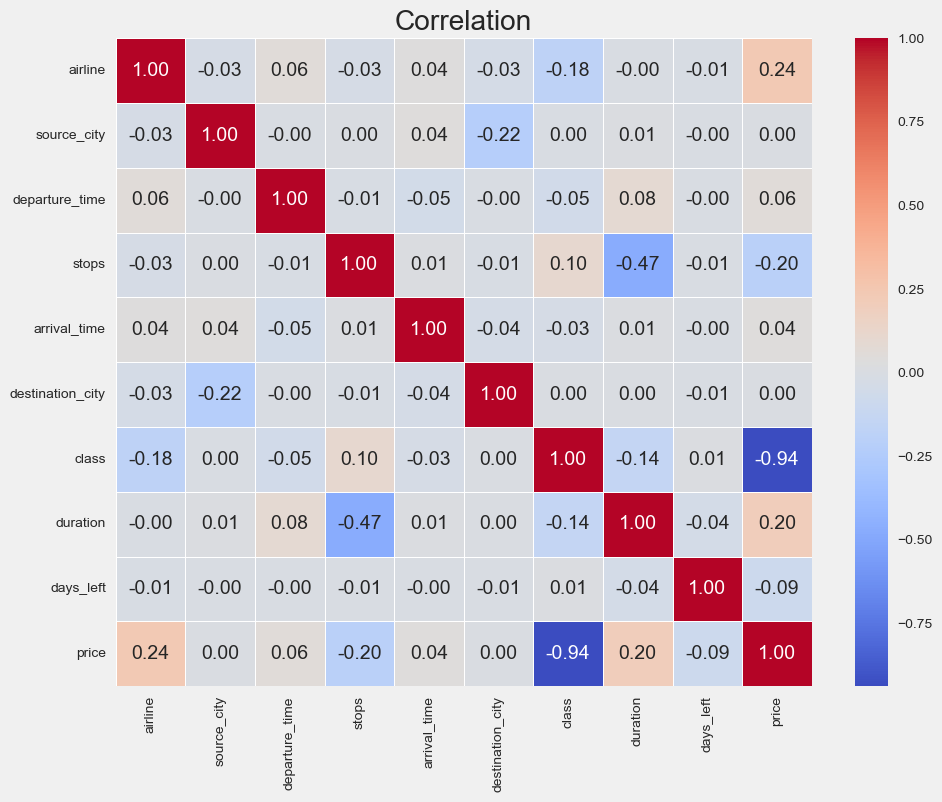

In [121]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation')

plt.show()

# Select Features & Target


In [122]:
X = df.drop(columns='price')

y = df['price']

# Spliting Datam


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)

In [ ]:
models = {

    'Linear Regression': LinearRegression(),

    'Ridge Regression': Ridge(alpha=1.0),

    'Lasso Regression': Lasso(alpha=0.1),

    'Random Forest Regressor': RandomForestRegressor(n_estimators=10, random_state=42),

    'SVR': SVR(kernel='rbf'),

    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),

    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=10, random_state=42),
    
    'XGBoost Regressor': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10),

    'CatBoost Regressor': catboost.CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0),

    'LightGBM Regressor': lgb.LGBMRegressor(n_estimators=10, learning_rate=0.1)

}

results = []



for model_name, model in models.items():

    model.fit(X_train, y_train)



    train_score = model.score(X_train, y_train)

    test_score = model.score(X_test, y_test)  

    

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    

    results.append({

        'Model': model_name,

        'Train R² Score': train_score,

        'Test R² Score': test_score,

        'Mean Squared Error': mse

    })



results_df = pd.DataFrame(results)



display(results_df)

